In [4]:
!pip install pandas-profiling==2.7.1

In [9]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

In [10]:
DF = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [11]:
profile = ProfileReport(DF)
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
DF

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4    1.6          1   
1        2   45          19      34     90089       3    1.5          1   
2        3   39          15      11     94720       1    1.0          1   
3        4   35           9     100     94112       1    2.7          2   
4        5   35           8      45     91330       4    1.0          2   
...    ...  ...         ...     ...       ...     ...    ...        ...   
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0            0              0                   1           0       0   
1            0              0                   1           0       0   
2            0              0                   0           0       0   
3            0              0                   0           0       0   
4            0              0                   0           0       0   
...        ...            ...                 ...         ...     ...   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
0              0  
1              0  
2              0  
3              0  
4              1  
...          ...  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1  

[5000 rows x 14 columns]

Detect Outlier


In [13]:
from collections import Counter

#drop the label 
outlier_list = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage',
                'Securities Account', 'CD Account', 'Online', 'CreditCard'] 

def detect_outlier(df,feature):
    
    outlier_indices = []
    
    for f in feature:
        
        #lower quartile
        q1 = np.percentile(df[f],25)
        
        #upper quartile
        q3 = np.percentile(df[f],75)
        
        #interquartile range
        iqr = q3-q1
         #with coefficient
        with_coef = 1.5*iqr
        
        #detect outlier(s)
        lower_rule = q1-with_coef
        upper_rule = q3+with_coef
        
        outlier_variable = df[(df[f]<lower_rule) | (df[f]>upper_rule)].index
        outlier_indices.extend(outlier_variable)
    
    #converting to amount
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

 
#drop outliers
DF = DF.drop(detect_outlier(DF,outlier_list),axis=0).reset_index(drop=True)

Data Analysis


In [14]:
DF.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4944 non-null   int64  
 1   Age                 4944 non-null   int64  
 2   Experience          4944 non-null   int64  
 3   Income              4944 non-null   int64  
 4   ZIP Code            4944 non-null   int64  
 5   Family              4944 non-null   int64  
 6   CCAvg               4944 non-null   float64
 7   Education           4944 non-null   int64  
 8   Mortgage            4944 non-null   int64  
 9   Personal Loan       4944 non-null   int64  
 10  Securities Account  4944 non-null   int64  
 11  CD Account          4944 non-null   int64  
 12  Online              4944 non-null   int64  
 13  CreditCard          4944 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 540.9 KB


In [15]:
DF.drop(['ZIP Code','ID'],axis=1,inplace=True)


In [16]:
DF.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [17]:
DF.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

# DATA Visualization

In [18]:
feature_list=['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage', 'CreditCard', 'Securities Account', 'CD Account','Online']


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

def draw_distribution(df,feature):
    """
    density
    """
    
    sns.distplot(df[feature])
    plt.show()

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


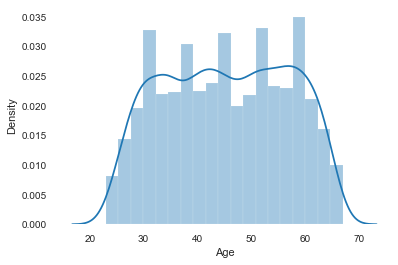

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


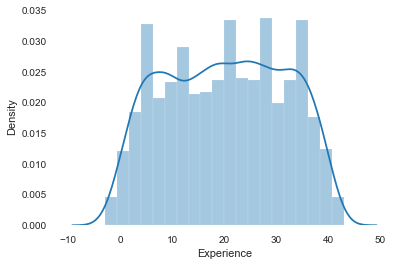

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


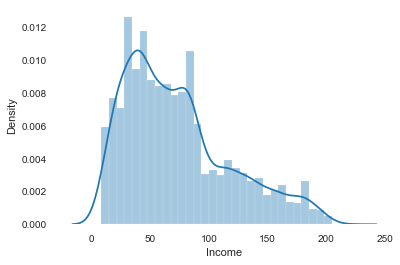

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


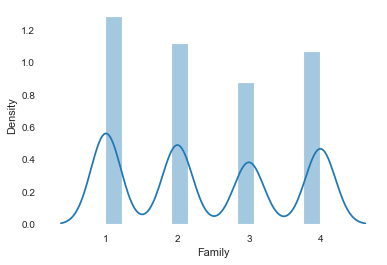

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


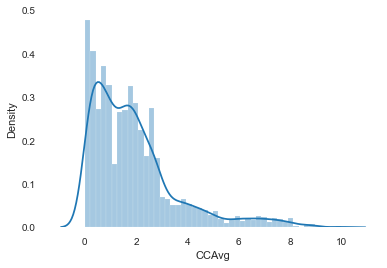

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


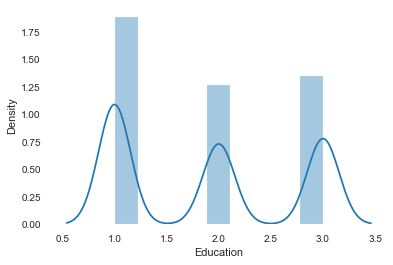

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


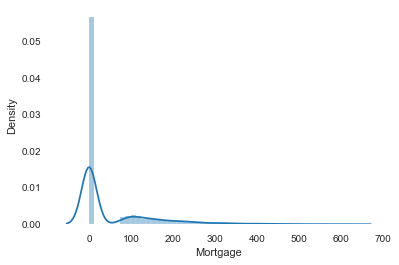

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


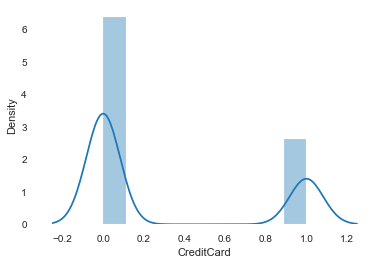

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


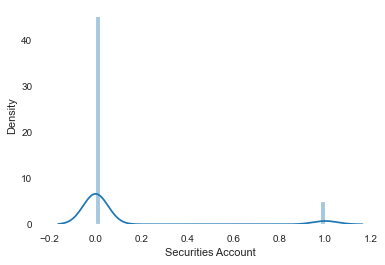

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


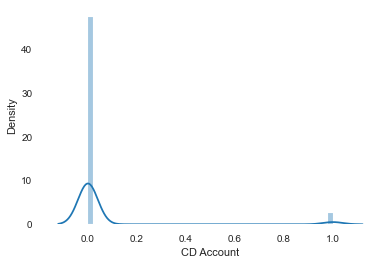

C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


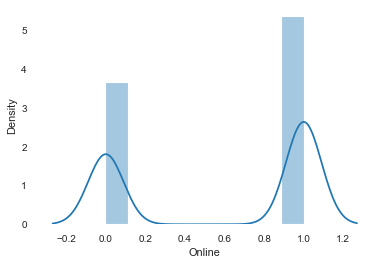

In [20]:
for i in feature_list:
    draw_distribution(DF,i)
    plt.show()

# Correlation Matrix

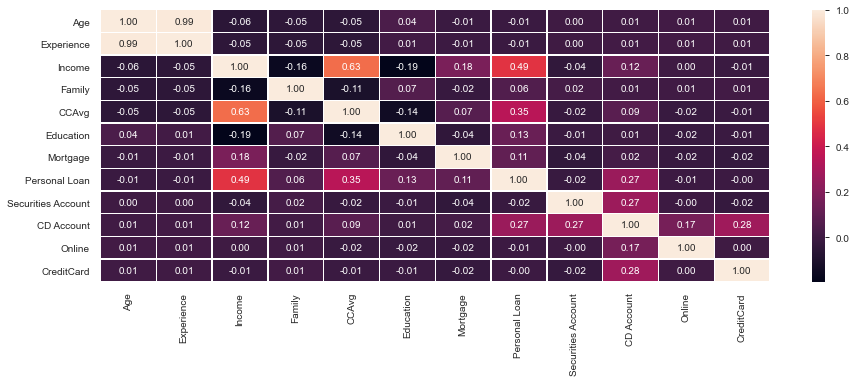

In [21]:
plt.figure(figsize=(15,5))
sns.heatmap(DF.corr(),annot=True,linewidths=.5,fmt='.2f')
plt.show()

# Feature Engineering

In [22]:
def catplot_func(df,x):
    """
    to analyze the impact between feature and target for categorical variables
    """
    plt.figure(figsize=(15,4))
    g = sns.catplot(data=df,x=x,y='Personal Loan',kind='bar',height=4)
    plt.xticks(rotation = 90)
    plt.show()


In [23]:
def pointplot_func(df,x):
    """
    to analyze the impact between feature and target for numerical variables
    """
    plt.figure(figsize=(30,4))
    plt.xticks(rotation=90)
    sns.pointplot(x=x,y='Personal Loan',data=df,color='darkblue')
    plt.xlabel(x,fontsize=14)
    plt.grid()
    

CD Account

In [24]:
DF['CD Account'].value_counts()


0    4688
1     256
Name: CD Account, dtype: int64

In [25]:
DF.drop(['CD Account'],axis=1,inplace=True)


Securities Account

In [26]:
DF['Securities Account'].value_counts()


0    4460
1     484
Name: Securities Account, dtype: int64

In [27]:
DF.drop(['Securities Account'],axis=1,inplace=True)


Mortgage


In [28]:
"""
Mortgage Group
(0) Group 1: 0 
(1) Group 2: Other Values
"""
DF['Mrt_Grp']=[0 if i==0 else 1 for i in DF.Mortgage]

<Figure size 1080x288 with 0 Axes>

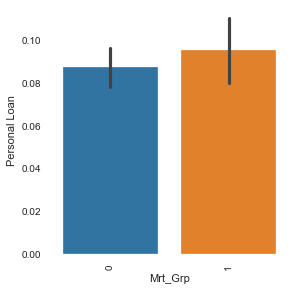

In [29]:
catplot_func(DF,'Mrt_Grp')

age


In [30]:
DF['Age_Grp'] = [0 if i <35 else 1 if i<55 and i>=35 else 2 for i in DF.Age]


<Figure size 1080x288 with 0 Axes>

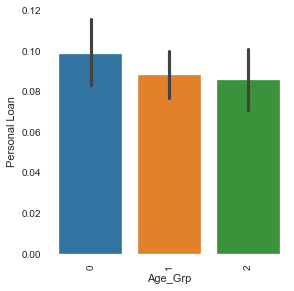

In [31]:
catplot_func(DF,'Age_Grp')


Experience

In [32]:
"""
Experience Group
(0) 0-10
(1) 11-20
(2) 20+
"""
DF['Exp_Grp'] = [0 if i <=10 else 1 if i<=20 and i>10 else 2 for i in DF.Experience]

<Figure size 1080x288 with 0 Axes>

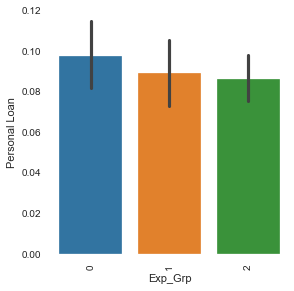

In [33]:
catplot_func(DF,'Exp_Grp')


Family


<Figure size 1080x288 with 0 Axes>

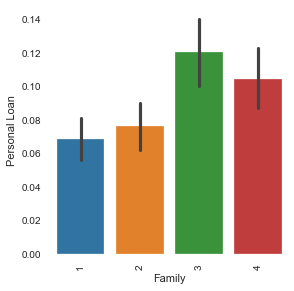

In [34]:
catplot_func(DF,'Family')


In [35]:
"""
Family Group
(0): 1-2
(1): 3-4
"""
threshold = 3
DF['Fml_Grp']= [0 if i <threshold else 1 for i in DF.Family]

CCAvg


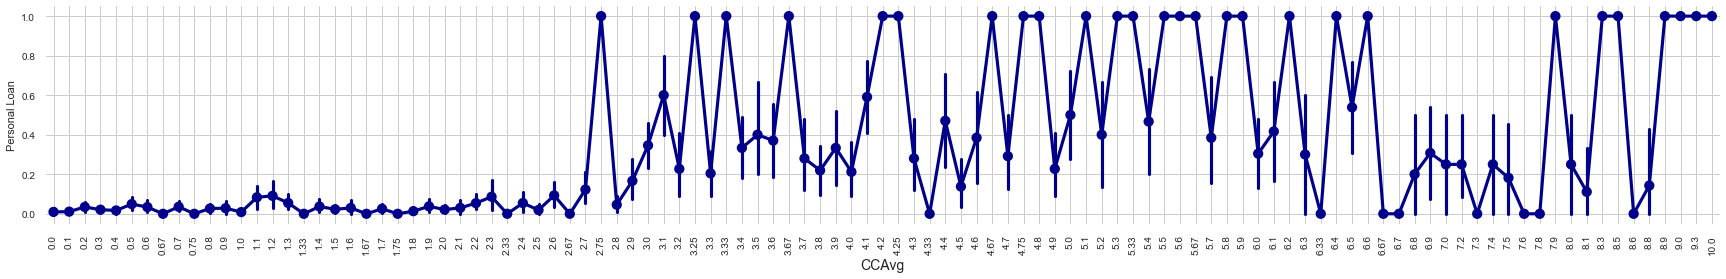

In [36]:
pointplot_func(DF,'CCAvg')


In [37]:
"""
CCAvg Group
(0): 0-27.499
(1): 27.5+
"""

threshold = 27.5
DF['CCA_Grp']=[0 if i < threshold else 1 for i in DF.CCAvg]

Education

<Figure size 1080x288 with 0 Axes>

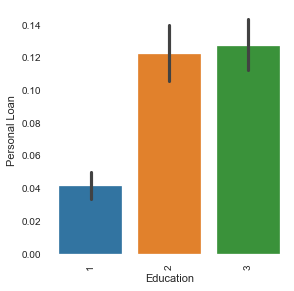

In [38]:
catplot_func(DF,'Education')


In [39]:
"""
Education Group
(0): 1
(1): 2-3
"""
DF['Edu_Grp']=[0 if i ==1 else 1 for i in DF.Education]

online

<Figure size 1080x288 with 0 Axes>

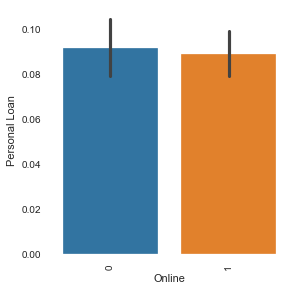

In [40]:
catplot_func(DF,'Online')


CreditCard

<Figure size 1080x288 with 0 Axes>

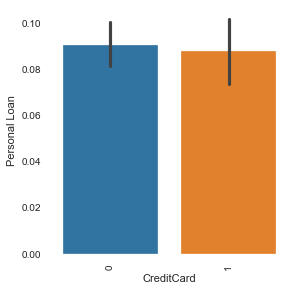

In [41]:
catplot_func(DF,'CreditCard')


income

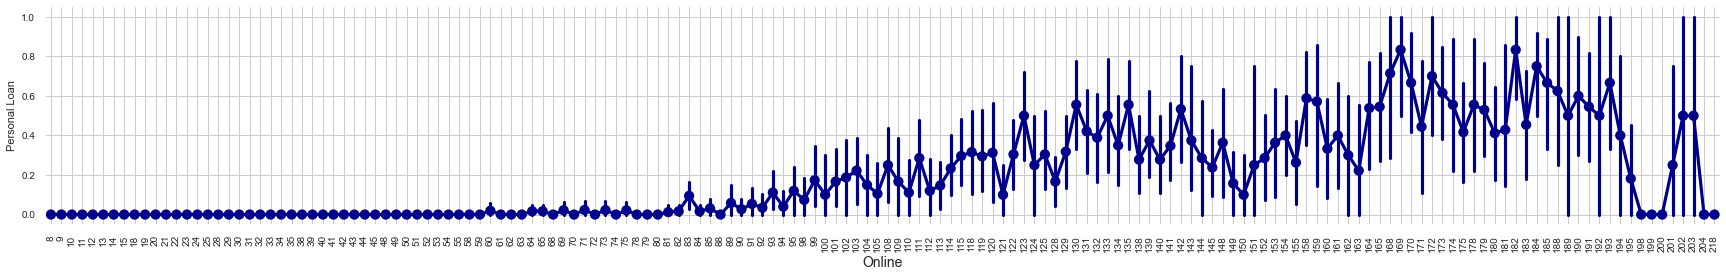

In [42]:
plt.figure(figsize=(30,4))
plt.xticks(rotation=90)
sns.pointplot(x=DF['Income'],y=DF['Personal Loan'],DF=DF,color='darkblue')
plt.xlabel(i,fontsize=14)
plt.grid()


In [43]:
threshold = 103
DF['Inc_Grp'] = [0 if i<threshold else 1 for i in DF.Income]

DROP 


In [44]:
DF.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Online', 'CreditCard', 'Mrt_Grp',
       'Age_Grp', 'Exp_Grp', 'Fml_Grp', 'CCA_Grp', 'Edu_Grp', 'Inc_Grp'],
      dtype='object')

In [45]:
#DF.drop(['Age','Experience','Income','Family','CCAvg','Education','Mortgage'],axis=1,inplace=True)


# dummies


In [46]:
data = pd.get_dummies(data=DF,columns=['Age_Grp','Exp_Grp'])


#TRAIN-TEST SPLIT 

In [47]:
from sklearn.model_selection import train_test_split


In [48]:
DF.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Online', 'CreditCard', 'Mrt_Grp',
       'Age_Grp', 'Exp_Grp', 'Fml_Grp', 'CCA_Grp', 'Edu_Grp', 'Inc_Grp'],
      dtype='object')

In [49]:
DF.head()

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Online  CreditCard  Mrt_Grp  Age_Grp  Exp_Grp  Fml_Grp  CCA_Grp  Edu_Grp  \
0       0           0        0        0        0        1        0        0   
1       0           0        0        1        1        1        0        0   
2       0           0        0        1        1        0        0        0   
3       0           0        0        1        0        0        0        1   
4       0           1        0        1        0        1        0        1   

   Inc_Grp  
0        0  
1        0  
2        0  
3        0  
4        0

In [50]:
X = data.drop('Personal Loan',axis=1)
y = data['Personal Loan']


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

#Scaling 

In [52]:
from sklearn.preprocessing import StandardScaler


In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Parameters 

In [54]:
lr_params = {'C':np.logspace(-3,3,7),
             'penalty':['l1','l2']}

        
knn_params = {'n_neighbors':np.arange(1,50)}

nb_params = {'var_smoothing': np.logspace(0,-9, num=100)}

rf_params =  {'max_features':[1,3,10],
              'min_samples_split':[2,3,10],
              'min_samples_leaf':[1,3,10],
              'bootstrap':[False],
              'n_estimators':[100,300],
              'criterion':['gini']}

gb_params = {'learning_rate':[0.001,0.01,0.1,0.05],
            'n_estimators':[100,500,100],
            'max_depth':[3,5,10],
            'min_samples_split':[2,5,10]
    
}

# Classifiers

In [55]:
classifier = [RandomForestClassifier(),
              LogisticRegression(),
              KNeighborsClassifier(),
              GaussianNB(),
              GradientBoostingClassifier()
             ]

In [56]:
param = [rf_params,lr_params,knn_params,nb_params,gb_params]


# Modeling and Optimization

In [57]:
ml_list = ['Random Forest','Logistic Regression','KNN','Naive Bayes','GradientBoosting']

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
cv_results = []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i],
                            param_grid=[param[i]],
                            cv = StratifiedKFold(n_splits=5),
                            scoring = 'roc_auc',
                             n_jobs= -1,
                             verbose = 1
                        
                            )
    clf.fit(X_train_scaled,y_train)
    cv_results.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print('Method: {}  Score: {} Best: {}' .format(classifier[i],cv_results[i],clf.best_estimator_))
    
results = pd.DataFrame({'CV Means':cv_results,
                       'ML Models':ml_list})

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Method: RandomForestClassifier()  Score: 0.9975051630649354 Best: RandomForestClassifier(bootstrap=False, max_features=10, min_samples_split=3)
Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\Amal_\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.94960785        nan 0.95802143        nan 0.95972036
        nan 0.96003935        nan 0.96026193        nan 0.96029675
        nan 0.96028636]
  warnings.warn(


Method: LogisticRegression()  Score: 0.9602967510747398 Best: LogisticRegression(C=100.0)
Fitting 5 folds for each of 49 candidates, totalling 245 fits
Method: KNeighborsClassifier()  Score: 0.9597726704747578 Best: KNeighborsClassifier(n_neighbors=49)
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Method: GaussianNB()  Score: 0.9369398430688755 Best: GaussianNB(var_smoothing=1.0)
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Method: GradientBoostingClassifier()  Score: 0.9976390974872948 Best: GradientBoostingClassifier(max_depth=5, min_samples_split=5)


C:\Users\Amal_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


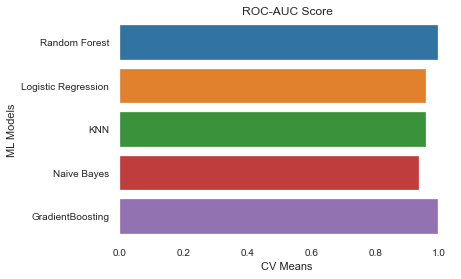

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.barplot('CV Means','ML Models',data=results)
g.set_title('ROC-AUC Score')
plt.show()

In [60]:
cv_results

[0.9975051630649354,
 0.9602967510747398,
 0.9597726704747578,
 0.9369398430688755,
 0.9976390974872948]

# Ensemble Modeling

In [61]:
from sklearn.ensemble import VotingClassifier
voting_c = VotingClassifier(estimators=[('rf',best_estimators[0]),
                                        ('lr',best_estimators[1]),
                                        ('knn',best_estimators[2]),
                                        ('nb',best_estimators[3]),
                                        ('gb',best_estimators[4])
                                       ],
                           voting='soft',
                           n_jobs=-1)

# Prediction

In [62]:
voting_c = voting_c.fit(X_train_scaled,y_train)
my_score = accuracy_score(voting_c.predict(X_test_scaled),y_test)
print(my_score)

0.9831536388140162
